<a href="https://colab.research.google.com/github/mridul-eecs/FashionMNIST_pytorch/blob/master/pyTorch_Scratch_BranchedCNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optimas 
import numpy as np

In [0]:
# setting the device for workout

print(torch.cuda.is_available())
device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

True


device(type='cuda', index=0)

  0%|          | 98304/26421880 [00:00<00:28, 933986.76it/s]

26427392it [00:00, 82445748.22it/s]                             


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


32768it [00:00, 537929.96it/s]
4423680it [00:00, 34134262.60it/s]                           

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



8192it [00:00, 184396.67it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!
Size of our training set: 60000
Size of our test set: 10000
Bincounts: tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])
Input tensor shape: torch.Size([1, 1, 28, 28])
Labels shape: torch.Size([1])


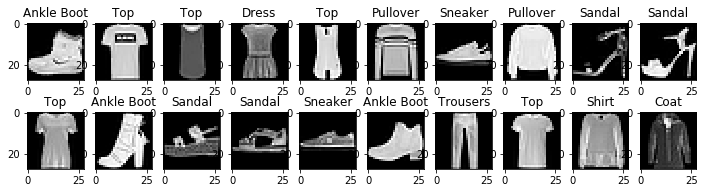

In [0]:
# importing the dataset 
import torchvision.transforms as transform
import matplotlib.pyplot as plt

train_dataset= torchvision.datasets.FashionMNIST(root= 'data/', train= True, download= True, transform= transform.ToTensor())
test_dataset= torchvision.datasets.FashionMNIST(root= 'data/', train= False, download= True, transform= transform.ToTensor())

batch_size= 100
train_loader= torch.utils.data.DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle= True)
test_loader= torch.utils.data.DataLoader(dataset= test_dataset, batch_size= batch_size, shuffle= True)


# about our dataset
print("Size of our training set:", len(train_dataset))
print("Size of our test set:", len(test_dataset))
print("Bincounts:", train_dataset.targets.bincount());

mapping = {
    0:'Top', 1:'Trousers', 2:'Pullover', 3:'Dress', 4:'Coat'
    ,5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'
}

display_loader= torch.utils.data.DataLoader(dataset= train_dataset, batch_size= 1)
batch= next(iter(display_loader))
images, labels= batch
print("Input tensor shape:", images.shape)
print("Labels shape:", labels.shape)

fig= plt.figure(figsize= (12, 3))
for i, batch in enumerate(display_loader, start= 1):
  images, labels= batch
  ax= fig.add_subplot(2, 10, i)  
  ax.imshow(images.reshape(28, 28), cmap= 'gray')
  ax.set_title(mapping[labels.item()])
  if i >= 20:
    break 
plt.show()




In [0]:
class Net(nn.Module):
    def __init__(self, num_classes= 10):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(kernel_size= 2, stride= 2),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(kernel_size= 2, stride= 2),
            # nn.Flatten()

        )
        self.conv1flatten= nn.Flatten()

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(kernel_size= 2, stride= 2),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(kernel_size= 2, stride= 2),
            # nn.Flatten()

        )        
        self.conv2flatten= nn.Flatten()

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=9),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(kernel_size= 2, stride= 2),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(kernel_size= 2, stride= 2),
            # nn.Flatten()

        )        
        
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=1312, out_features=720), # 12 * 4 * 4 
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm1d(1440),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=720, out_features=360),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm1d(720),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(in_features=360, out_features=180),
            # nn.init.kaiming_normal_(),
            # nn.BatchNorm1d(360),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.out = nn.Sequential(
            nn.Linear(in_features=180, out_features= num_classes),
            # nn.init.kaiming_normal_(),
        )
        

    def forward(self, t):
      # (1) input layer
      t = t
      t1= self.conv1(t)
      t2= self.conv2(t)
      t3= self.conv3(t)
      t= torch.cat((self.conv1flatten(t1), self.conv2flatten(t2)), dim= 1)
      t= self.fc1(t)
      t= self.fc2(t)
      t= self.fc3(t)
      t= self.out(t)

      return t3, t

In [0]:
num_classes= 10
model= Net(num_classes).to(device)


In [0]:
model

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Dropout2d(p=0.5, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Dropout2d(p=0.5, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv1flatten): Flatten()
  (conv2): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout2d(p=0.5, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (5): ReLU()
    (6): Dropout2d(p=0.5, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2flatten): Flatten()
  (conv3): Sequential(
    (0): Conv2d(1, 16, kernel_size=(9, 9), stride=(1, 1))
    (1

In [0]:
# testing out model without training
sample= next(iter(train_dataset))
image, label= sample
print("Shape of the input image:", image.shape)

layer, pred= model(image.unsqueeze(0).to(device))  
print("Prediction:", pred)
print("Expected:", mapping[label], "| Prediction:", mapping[pred.argmax().item()])

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

Shape of the input image: torch.Size([1, 28, 28])


RuntimeError: ignored

In [0]:
print(model.conv2[0])
print(layer.shape)


Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
torch.Size([1, 32, 4, 4])


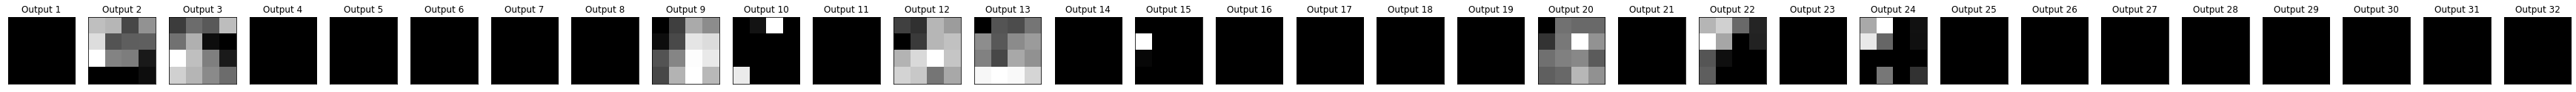

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 32):
    fig = plt.figure(figsize=(62, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))
viz_layer(layer.cpu())

In [0]:
# network = model
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):

  total_loss = 0
  total_correct = 0

  for batch in train_loader: # Get Batch

      images, labels = batch 

      images= images.to(device)
      labels= labels.to(device)

      preds = model(images) # Pass Batch
      loss = f.cross_entropy(preds, labels) # Calculate Loss

      optimizer.zero_grad()
      loss.backward() # Calculate Gradients
      optimizer.step() # Update Weights

      total_loss += loss.item()
      total_correct += get_num_correct(preds, labels)
      
  print(
      "epoch:", epoch, 
      "total_correct:", total_correct, 
      "loss:", total_loss
  )

epoch: 0 total_correct: 39824 loss: 530.7761318087578
epoch: 1 total_correct: 47543 loss: 335.7817859351635
epoch: 2 total_correct: 49291 loss: 294.705487459898
epoch: 3 total_correct: 50319 loss: 271.8321807682514
epoch: 4 total_correct: 50832 loss: 254.9381126910448
epoch: 5 total_correct: 51122 loss: 247.7790612578392
epoch: 6 total_correct: 51405 loss: 238.3573652356863
epoch: 7 total_correct: 51560 loss: 231.8851028829813
epoch: 8 total_correct: 51819 loss: 226.14834015071392
epoch: 9 total_correct: 51967 loss: 223.02584382891655
epoch: 10 total_correct: 52033 loss: 219.26930052042007
epoch: 11 total_correct: 52240 loss: 215.77831563353539
epoch: 12 total_correct: 52244 loss: 212.96252936124802
epoch: 13 total_correct: 52335 loss: 211.89177183806896
epoch: 14 total_correct: 52515 loss: 208.60197059810162
epoch: 15 total_correct: 52520 loss: 205.50430864095688
epoch: 16 total_correct: 52682 loss: 204.10180109739304
epoch: 17 total_correct: 52700 loss: 201.97588931024075
epoch: 18 t

In [0]:
model.conv1[0].weight

Parameter containing:
tensor([[[[-1.7990e-02,  3.0842e-02, -2.3291e-02, -1.4474e-02,  5.0704e-02],
          [-3.4958e-02, -4.6800e-02,  4.6592e-02, -5.3254e-02,  3.8517e-02],
          [ 9.9543e-02, -2.8296e-02, -1.3046e-01,  2.0390e-02,  1.8859e-01],
          [ 2.1782e-01, -9.8338e-02,  1.1958e-01,  1.1983e-01, -1.6653e-01],
          [-7.8397e-02,  1.6148e-01,  7.9670e-02, -1.8538e-01, -6.2991e-01]]],


        [[[-6.1964e-01, -1.5281e+00, -1.4026e+00, -1.0540e+00, -4.5047e-01],
          [ 6.0781e-02, -4.3848e-01, -4.8577e-02,  1.7695e-01,  9.7682e-02],
          [ 2.5847e-01,  1.3066e-01, -4.5324e-03, -2.1098e-01,  7.3244e-02],
          [ 2.1764e-02, -1.2442e-01, -4.0748e-02,  2.6418e-03, -3.4058e-02],
          [ 2.5583e-01,  6.6850e-03, -6.9963e-02, -5.8302e-02, -1.7086e-02]]],


        [[[-1.9790e-02, -1.2373e-01,  1.8241e-01,  5.3283e-02,  4.6942e-03],
          [-1.7193e-01,  1.7195e-01,  2.3836e-02, -2.1343e-02, -2.8478e-02],
          [ 4.5959e-03, -4.5776e-02,  1.6217e-

In [0]:
model.conv2[0].weight

Parameter containing:
tensor([[[[ 3.6011e-01, -9.5651e-02, -3.0078e-01],
          [ 1.1491e-01,  5.3771e-02,  9.2828e-02],
          [-3.1269e-01,  2.4944e-01, -1.3578e-01]]],


        [[[ 4.0366e-01, -3.7802e-01,  3.3622e-02],
          [ 7.2465e-02,  2.3085e-01, -2.2581e-01],
          [-3.0494e-01,  7.9709e-02,  1.0205e-01]]],


        [[[ 3.0099e-01, -3.0518e-01,  7.1098e-02],
          [ 6.1099e-02,  2.9514e-01, -2.9776e-01],
          [-2.7994e-01,  1.2829e-01,  9.5965e-02]]],


        [[[-1.4330e+00, -2.0537e+00, -3.5803e-01],
          [ 1.3617e-01, -3.0113e-01,  1.7119e-02],
          [-8.6629e-02,  8.2718e-02,  1.7764e-01]]],


        [[[-7.4855e-01, -8.5688e-01, -4.1994e-01],
          [-2.6698e-01, -1.7029e+00, -1.5763e+00],
          [ 7.9813e-02, -3.5820e-02, -7.6342e-02]]],


        [[[-1.0839e+00, -2.0346e+00, -3.2765e-01],
          [-1.1894e+00, -6.2630e-01,  1.3458e-01],
          [ 1.1373e-02, -1.6681e-01,  1.7190e-01]]],


        [[[-8.1927e-02, -1.9978e-01,